In [1]:
from astropy.table import Table
from glob import glob
import os
from pathlib import Path
import matplotlib.pylab as plt
import matplotlib as mpl
from mpl_toolkits.axes_grid1 import make_axes_locatable


import numpy as np
import pandas as pd
import sys
sys.path.insert(1, '../../../code/modules/')

# import custom module

import custom as c
from astropy.io import fits

../../../code/modules/custom.py:52: RuntimeWarning: divide by zero encountered in log10
  im = plt.imshow(np.log10(cluster),cmap=cmap,interpolation='none')


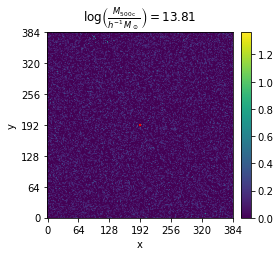

In [2]:
fnames = glob('../../../data/eROSITA/*.fits')

x = c.Cluster(fnames[0])
x.plot()

In [ ]:
fnames = glob('../../../data/eROSITA/*.fits')

clusterList = np.load('../../../data/eROSITA/clusterList.npy')


columns = clusterList.dtype.names
print(columns)


df = pd.DataFrame(clusterList,columns=columns)
max(df.R500_pixel)

In [ ]:
for fpath in fnames:
    with fits.open(fpath) as data:
        cluster = pd.DataFrame(data[0].data)

    cluster = cluster.to_numpy()
    plt.figure(figsize=(4,4))
    file_name = Path(fpath).stem
    cluster_row = clusterList[clusterList['id']==int(file_name)]
    log_m = np.log10(cluster_row['M500_msolh'])[0]
    plt.title(r'$\log\left(\frac{M_\mathrm{500c}}{h^{-1}\,M_\odot}\right) = $'+'{:.2f}'.format(log_m))
    
    cmap = mpl.cm.viridis
    lam = 0.1133929878
    noise = np.random.poisson(lam=lam, size=cluster.shape)

    plt.imshow(noise,cmap=cmap)
    im = plt.imshow(np.log10(cluster),cmap=cmap,interpolation='none')

    ax = plt.gca()
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.12)

    plt.colorbar(im, cax=cax)
    ax.set_xticks(np.linspace(0,384,7))
    ax.set_yticks(np.linspace(0,384,7))

    ax.set_xlabel("x"), ax.set_ylabel("y")
    ax.set_facecolor('#DADADA')
    plt.tight_layout()
    #plt.savefig('../figs/eROSITA/' + file_name + '.png',dpi=250,bbox_inches='tight')

    ax.invert_yaxis()

    plt.close()

In [ ]:
mid_pixel = 192
for fpath in fnames:
    with fits.open(fpath) as data:
        cluster = pd.DataFrame(data[0].data)
    cluster = cluster.to_numpy()
    
    file_name = Path(fpath).stem
    cluster_row = clusterList[clusterList['id']==int(file_name)]
    log_m = np.log10(cluster_row['M500_msolh'])[0]
    r_pixel = int(cluster_row['R500_pixel'][0])

    if log_m < 14.25:
        continue
    fig, axes = plt.subplots(nrows = 1, ncols=2, figsize=(8,4),sharey=True)
    cmap = mpl.cm.viridis
    
    for idx in [0,1]:
        
        # grab current axis
        ax = axes[idx]
        ax.set_title(r'$\log\left(\frac{M_\mathrm{500c}}{h^{-1}\,M_\odot}\right) = $'+'{:.2f}'.format(log_m))

            
        # ADD NOISE
        lam = 0.1133929878
        noise = np.random.poisson(lam=lam, size=cluster.shape)
        ax.imshow(noise,cmap=cmap)
                
        # SET TICKS
        ax.set_xticks(np.linspace(0,384,7))
        ax.set_yticks(np.linspace(0,384,7)) 
        ax.set_xlabel("x")
        ax.invert_yaxis()
        size = 40
        mid_pix = 192-size/2
        if idx == 0:
            im = ax.imshow(np.log10(cluster),cmap=cmap,interpolation='none',zorder=20)
            circle = plt.Circle((mid_pixel, mid_pixel), r_pixel, color="red",fill=False,zorder=2000)
            ax.add_patch(circle)
            ax.set_ylabel("y")
        if idx == 1:
            axis_idx = np.random.randint(low=0,high=3,size=1) # 0 or 1, 3


            cluster_shift = np.roll(cluster,shift=y_shift,axis=0)
            cluster_shift = np.roll(cluster_shift,shift=x_shift,axis=1)
            
            im = ax.imshow(np.log10(cluster_shift),cmap=cmap,interpolation='none',zorder=20)
            circle = plt.Circle((mid_pixel + x_shift, mid_pixel + y_shift), r_pixel, color="red",fill=False,zorder=2000)
            ax.add_patch(circle)
                        
            # ADD COLOR BAR
            divider = make_axes_locatable(ax)
            cax = divider.append_axes("right", size="5%", pad=0.12)
            plt.colorbar(im, cax=cax)
            
            
            ax.text(0.25, 0.95, r'$\delta x={}, \ \delta y={}$'.format(x_shift,y_shift), ha='center', va='center', transform=ax.transAxes,color='white')

    plt.tight_layout()
    plt.savefig('../../../figs/eROSITA/transform/' + file_name + '.png',dpi=250,bbox_inches='tight')

    plt.show()
    plt.close()

In [ ]:
# neural network thoughts
neuron_count = 384*384
print(neuron_count)

# wavelet decomposition

# building a cnn from papers
# x-rayr

One-to-one 2/11/2020

- poisson distribution value and photon counts 
    - ~0.11 photon count per second?
    - 
    
- randomizing center of cluster
    - managed this, mostly
    - concerned with separation of cluster at bordered with numpy roll
        - lower shift limits (look R500_pixel)
        - identifies clusters within max(shift) of borders of image
    
- able to retreive cluster statstics from .npy file
    - mass
    - noticied x,y,z coordinates available=> can this be transformed to center of cluster pixel? (see above)
        - for randomizing cluster center
        - for help analyzing how CNN identifies center or not (much later)
        
to do:
wavelet decomposition 

Thomas boller

0.5 - 2 keV
z = 0.1-0.3
Mlog = 
